# **Decision trees**

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision.

**Decision Tree Terminology**
* Root node
* Child node
* leaf node

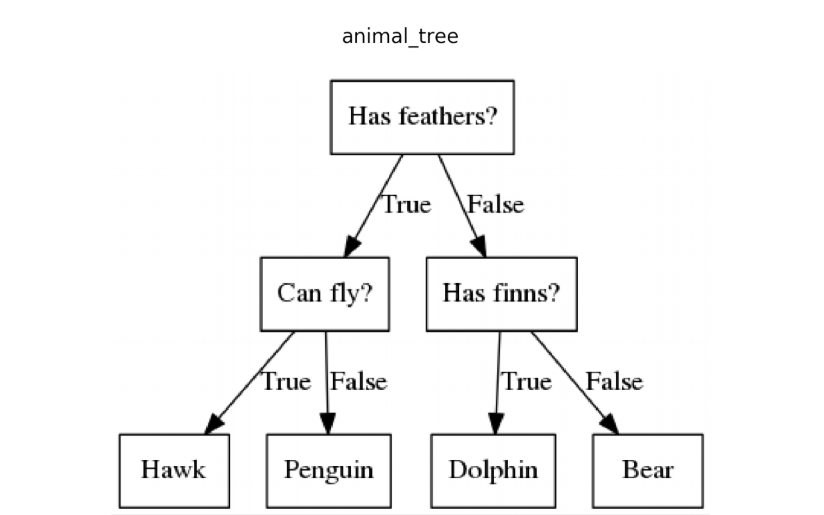


Let’s go through the process of building a decision tree for the 2D classification dataset shown in the figure below. The dataset consists of two half-moon shapes, with each class consisting of 50 data points. We will refer to this dataset as **two_moons**.

Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly. In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). The tests that are used on continuous data shown in the figure are of the form “Is feature i larger than value a?”

In [1]:
pip install graphviz

In [2]:
pip install mglearn

     |████████████████████████████████| 540 kB 7.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=717b25a1dc3614634f2d5547c0c8ae99a87f3ea50017c1e645e5a05712697adc
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


Decision Trees are structured-Classifier.
* Decision Nodes (test something based on some attributes)
* Leaf Nodes (show classification value or example)

**Decision Trees work for both Classification and Regression, but are popular for Classification task.**

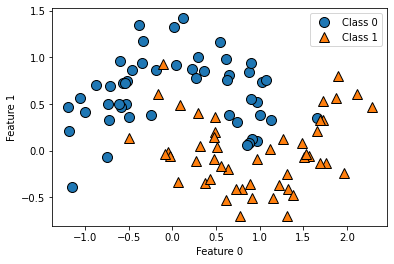

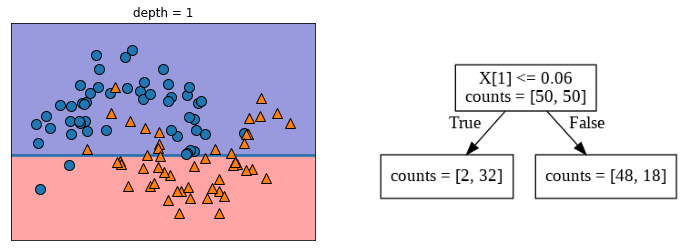

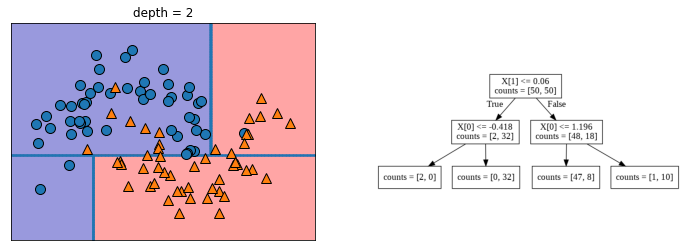

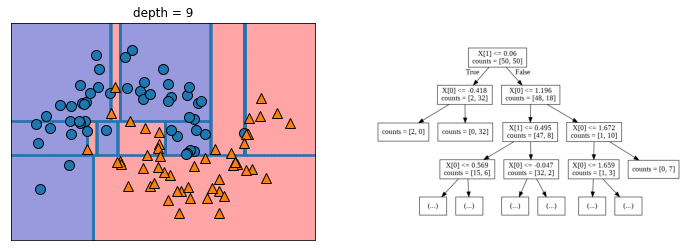

In [3]:
import mglearn
import graphviz

mglearn.plots.plot_tree_progressive()

Figure with depth=1 shows the first test that is picked. Splitting the dataset vertically at x[1]=0.06 yields the most information; it best separates the points in class 1 from the points in class 0. The top node, also called the root, represents the whole dataset, consisting of 50 points belonging to class 0 and 50 points belonging to class 1. The split is done by testing whether x[1] <= 0.06, indicated by a line. If the test is true, a point is assigned to the left node, which contains 2 points belonging to class 0 and 32 points belonging to class 1. Otherwise the point is assigned to the right node, which contains 48 points belonging to class 0 and 18 points belonging to class 1. These two nodes correspond to the top and bottom regions shown in figure (depth=1). Even though the first split did a good job of separating the two classes, the bottom region still contains points belonging to class 0, and the top region still contains points belonging to class 1. We can build a more accurate model by repeating the process of looking for the best test in both regions. Figure with depth=2 shows that the most informative next split for the left and the right region is based on x[0].

This recursive process yields a binary tree of decisions, with each node containing a test. Alternatively, you can think of each test as splitting the part of the data that is currently being considered along one axis. This yields a view of the algorithm as building a hierarchical partition. As each test concerns only a single feature, the regions in the resulting partition always have axis-parallel boundaries.

The recursive partitioning of the data is repeated until each region in the partition (each leaf in the decision tree) only contains a single target value (a single class or a single regression value). A leaf of the tree that contains data points that all share the same target value is called pure. The final partitioning for this dataset is shown in figure with depth=9.|

A prediction on a new data point is made by checking which region of the partition of the feature space the point lies in, and then predicting the majority target (or the single target in the case of pure leaves) in that region. The region can be found by traversing the tree from the root and going left or right, depending on whether the test is fulfilled or not.

It is also possible to use trees for regression tasks, using exactly the same technique. To make a prediction, we traverse the tree based on the tests in each node and find the leaf the new data point falls into. The output for this data point is the mean target of the training points in this leaf.

# Controlling complexity of decision trees

Typically, building a tree as described here and continuing until all leaves are pure leads to models that are very complex and highly overfit to the training data. The presence of pure leaves mean that a tree is 100% accurate on the training set; each data point in the training set is in a leaf that has the correct majority class.

**The overfitting can be seen on the left of figure with depth=9.** You can see the regions determined to belong to class 1 in the middle of all the points belonging to class 0. On the other hand, there is a small strip predicted as class 0 around the points belonging to class 1. This is not how one would imagine the decision boundary to look, and the decision boundary focuses a lot on single outlier points that are far away from the other points in that class.

**There are two common strategies to prevent overfitting**: stopping the creation of the tree early (also called pre-pruning), or building the tree but then removing or collapsing nodes that contain little information (also called post-pruning or just pruning).

***Possible criteria for pre-pruning include limiting the maximum depth of the tree, limiting the maximum number of leaves, or requiring a minimum number of points in a node to keep splitting it.***

Decision trees in **scikit-learn** are implemented in the **DecisionTreeRegressor** and **DecisionTreeClassifier** classes. scikit-learn only implements pre-pruning, not post-pruning.

**Let’s look at the effect of pre-pruning in more detail on the Breast Cancer dataset.** As always, we import the dataset and split it into a training and a test part. Then we build a model using the default setting of fully developing the tree (growing the tree until all leaves are pure).

In [5]:
from sklearn.tree import DecisionTreeClassifier     ## Importing Decision Tree Classifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()     #loading Breast cancer dataset

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)      ### Appying Decision Tree Algorithm on Train & Test data

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


As expected, the accuracy on the training set is 100%—because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data. The test set accuracy is slightly worse than for the linear models we looked at previously, which had around 95% accuracy.

**If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex. Unpruned trees are therefore prone to overfitting and not generalizing well to new data.**

Now let’s apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data. One option is to stop building the tree after a certain depth has been reached. ***Here we set max_depth=4, meaning only four consecutive questions can be asked. Limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set:***

In [6]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)    ## Creating a Decision-Tree model with depth-4
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


**Analyzing decision trees**

We can visualize the tree using the **export_graphviz** function from the **tree** module. This writes a file in the .dot file format, which is a text file format for storing graphs. We set an option to color the nodes to reflect the majority class in each node and pass the class and features names so the tree can be properly labeled:



In [7]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

We can read this file and visualize it. Let us see the visualization of the decision tree built on the Breast Cancer dataset.



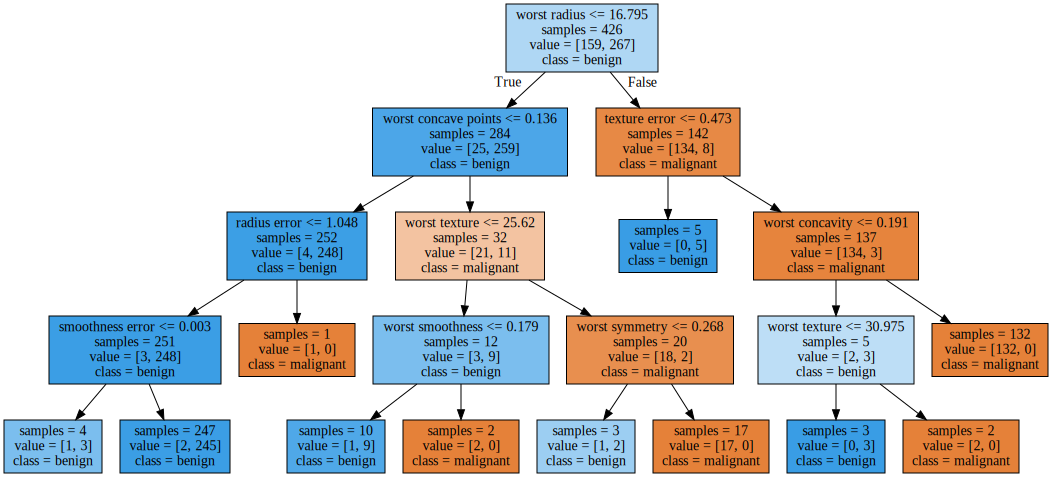

In [8]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

*The visualization of the tree provides a great in-depth view of how the algorithm makes predictions, and is a good example of a machine learning algorithm that is easily explained to non-experts.* However, even with a tree of depth four, as seen here, the tree can become a bit overwhelming. **Deeper trees (a depth of 10 is not uncommon) are even harder to grasp. One method of inspecting the tree that may be helpful is to find out which path most of the data actually takes.**

The parameter samples shown in each node in figure gives the number of samples in that node, while value provides the number of samples per class. Following the branches to the right, we see that worst radius <= 16.795 creates a node that contains only 8 benign but 134 malignant samples. The rest of this side of the tree then uses some finer distinctions to split off these 8 remaining benign samples. Of the 142 samples that went to the right in the initial split, nearly all of them (132) end up in the leaf to the very right.

Taking a left at the root, for worst radius > 16.795 we end up with 25 malignant and 259 benign samples. Nearly all of the benign samples end up in the second leaf from the right, with most of the other leaves containing very few samples.

**Feature importance in trees**

Instead of looking at the whole tree, which can be taxing, there are some useful properties that we can derive to summarize the workings of the tree. **The most commonly used summary is feature importance, which rates how important each feature is for the decision a tree makes.** It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1:



In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


The above summary is not entirely convenient, since we do not know how the given importance corresponds to the features. To fix it, let's use the code below:


In [9]:
for name, score in zip(cancer["feature_names"], tree.feature_importances_):
    print(name, score)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.010197368202069328
texture error 0.0483982536186494
perimeter error 0.0
area error 0.0
smoothness error 0.002415595085315826
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.7268285094603201
worst texture 0.045815897088866304
worst perimeter 0.0
worst area 0.0
worst smoothness 0.014157702104714051
worst compactness 0.0
worst concavity 0.0181879968644502
worst concave points 0.12211319926548449
worst symmetry 0.01188547831013032
worst fractal dimension 0.0


We can visualize the feature importances in the following way. Let us look at the feature importances computed from a decision tree learned on the Breast Cancer dataset.


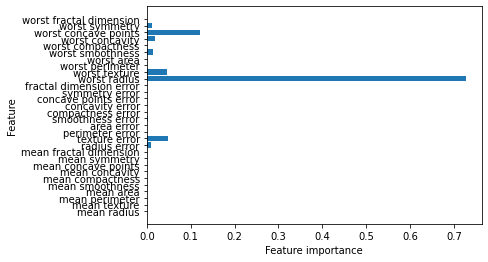

In [10]:
#import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

**Here we see that the feature used in the top split (“worst radius”) is by far the most important feature. This confirms our observation in analyzing the tree that the first level already separates the two classes fairly well.**

*However, if a feature has a low feature_importance, it doesn’t mean that this feature is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information.*

In contrast to the coefficients in linear models, feature importances are always positive, and don’t encode which class a feature is indicative of. The feature importances tell us that “worst radius” is important, but not whether a high radius is indicative of a sample being benign or malignant. In fact, there might not be such a simple relationship between features and class, as you can see in the following example:

Feature importances: [0. 1.]


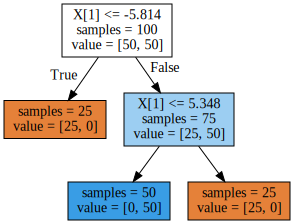

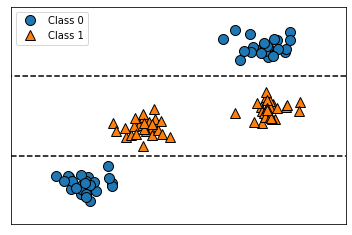

In [ ]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

The plot shows a dataset with two features and two classes.

Here, all the information is contained in X[1], and X[0] is not used at all. But the relation between X[1] and the output class is not monotonous, meaning we cannot say “a high value of X[0] means class 0, and a low value means class 1” (or vice versa).



Stopping Criteria for Induction Decision Tree

When to Stop

* All features are exhausted
* All leaf nodes are same
* Too few examples

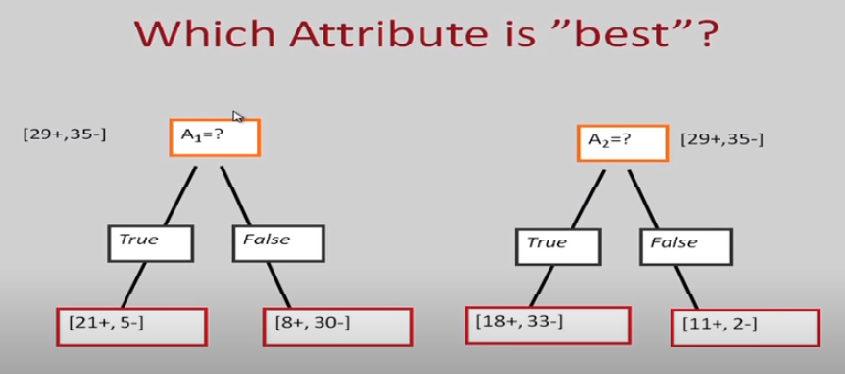

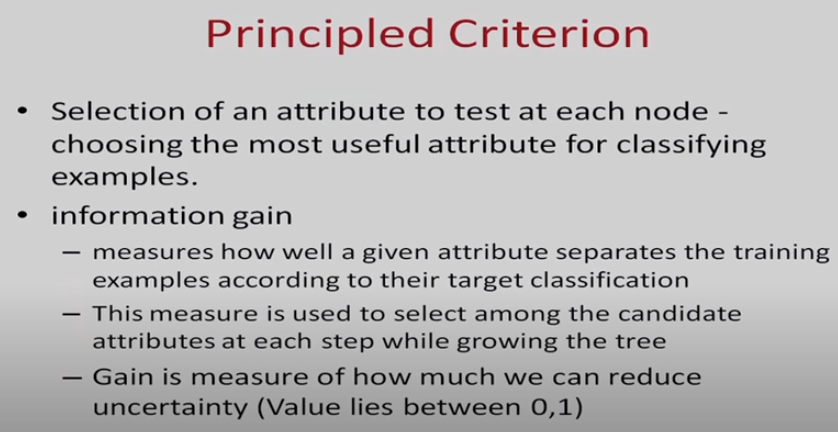

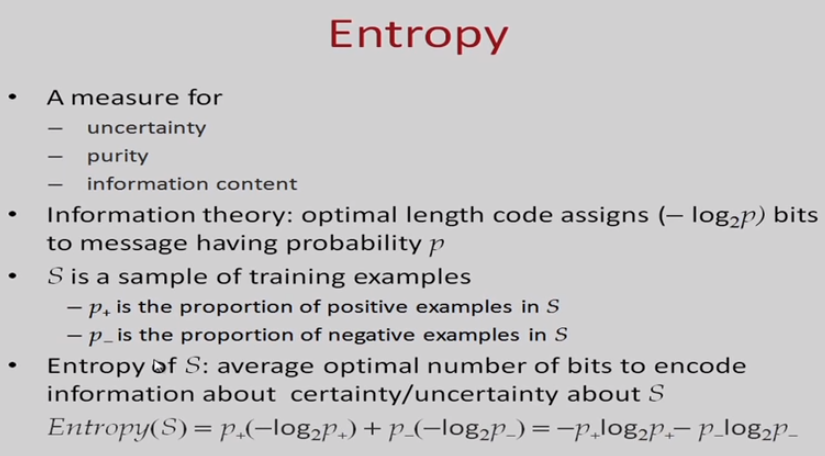

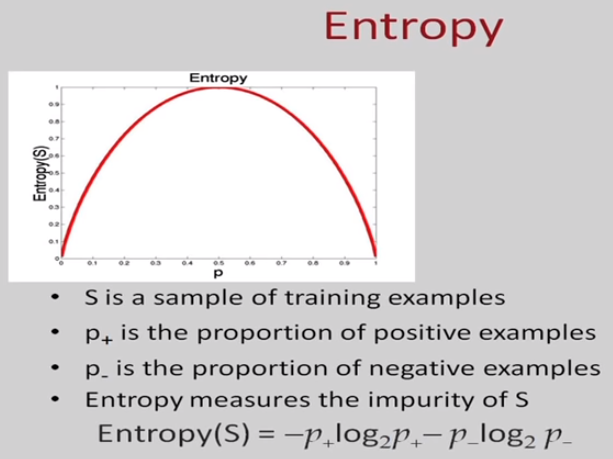

# Entropy and Information Gain for Induction Decision Trees

> **Entropy** is the measure of impurity in the dataset. In decision tree, subset instances contain similar values (homogenuous data). *Decision Tree Algorithm uses Entropy to calculate the homogeneity of sample.* If a sample is completely homogenous the entropy is Zero, if a sample is equally-distributed then it has maximum entropy of 1.



> **Information Gain**, *Gain(S, A)*: expected reduction in entropy due to partitioning *S* on attribute *A*.





An ideal leaf node is a node, where all nodes belong to only one class and Entropy is zero.

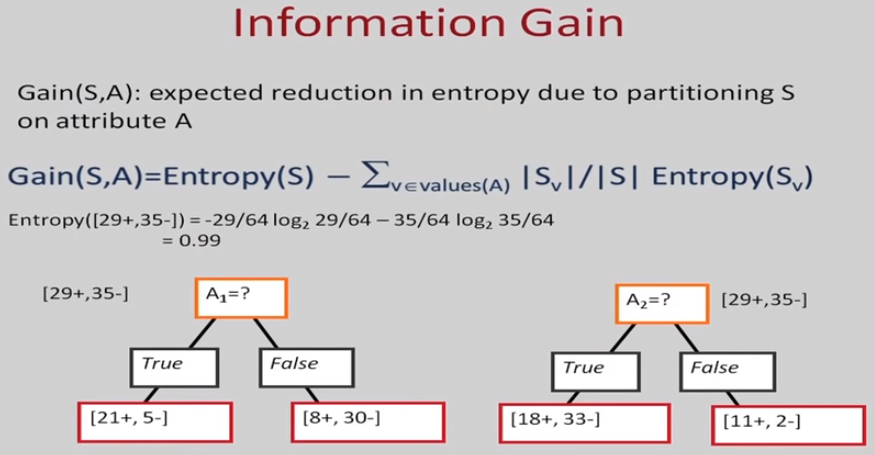

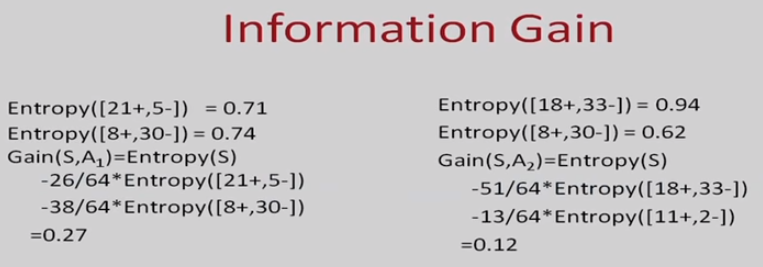

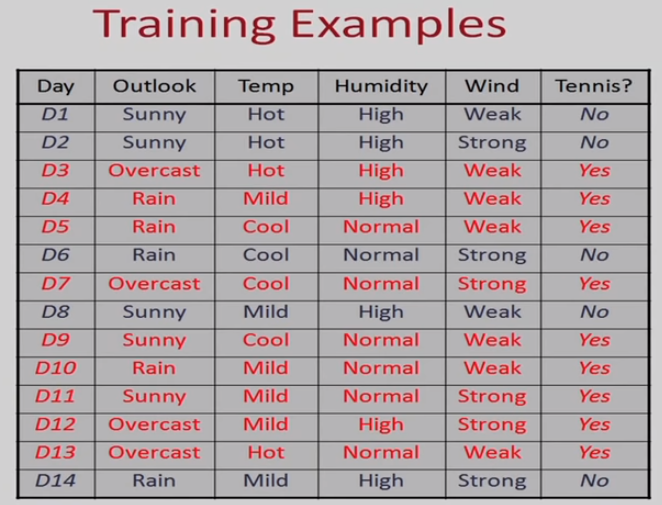

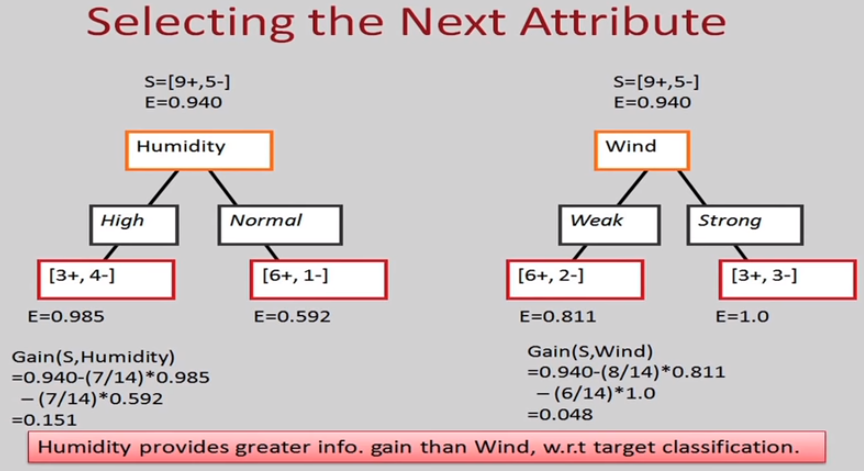

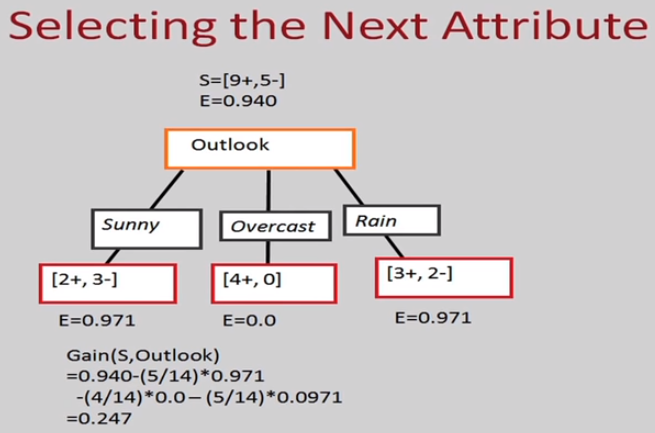

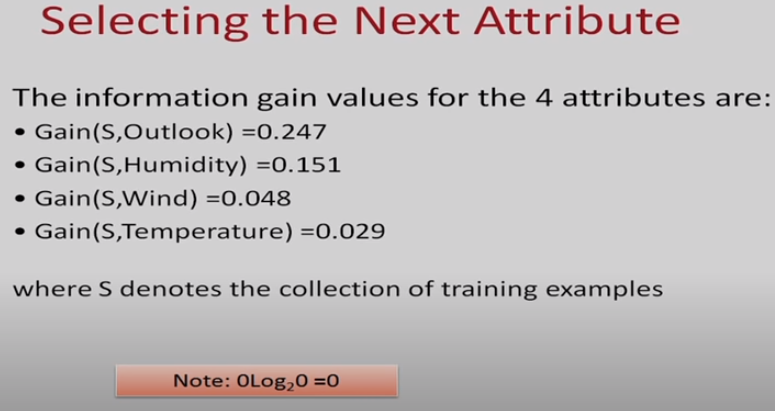

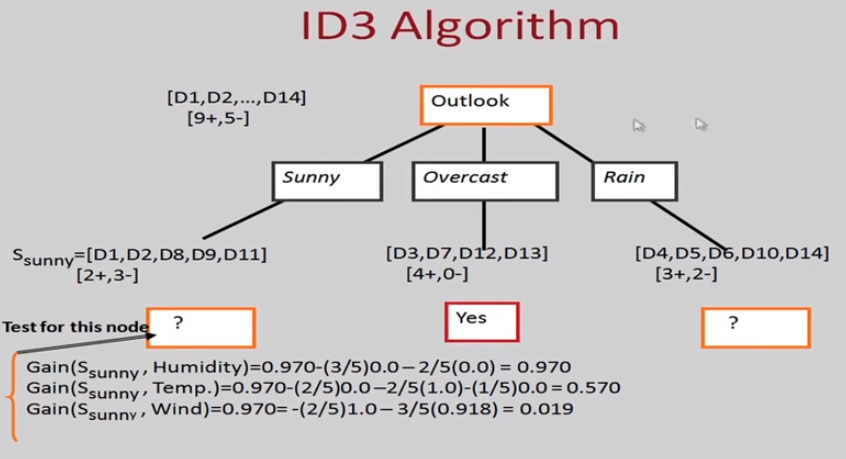

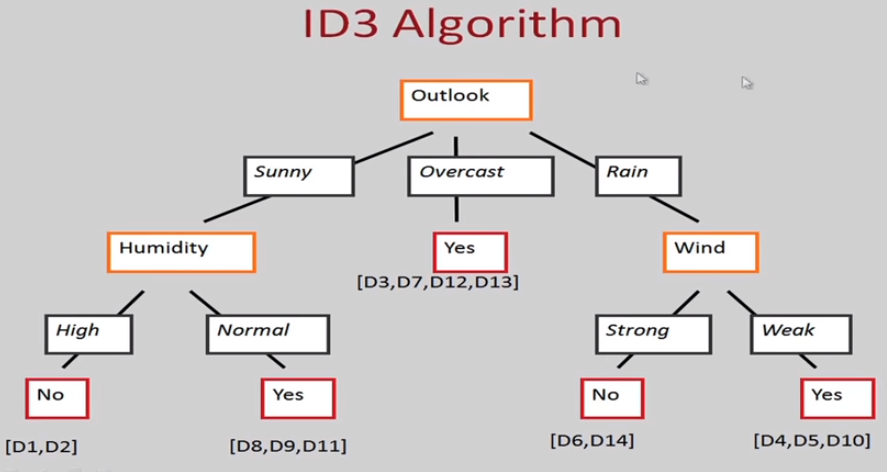

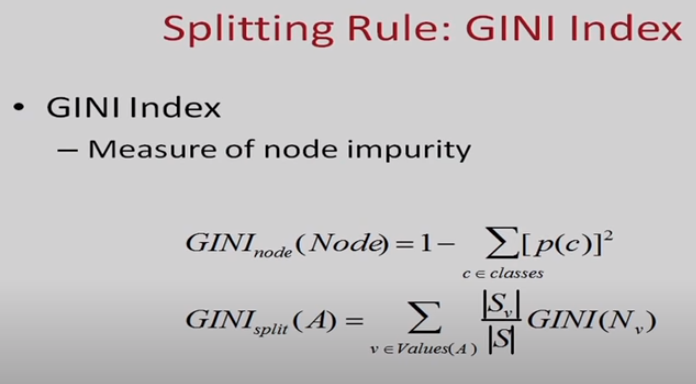

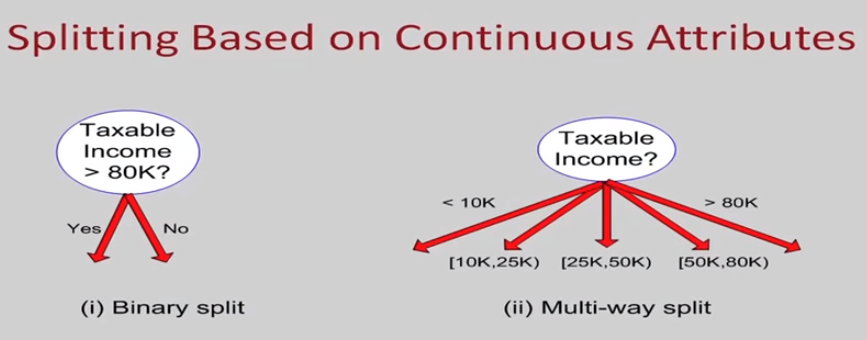

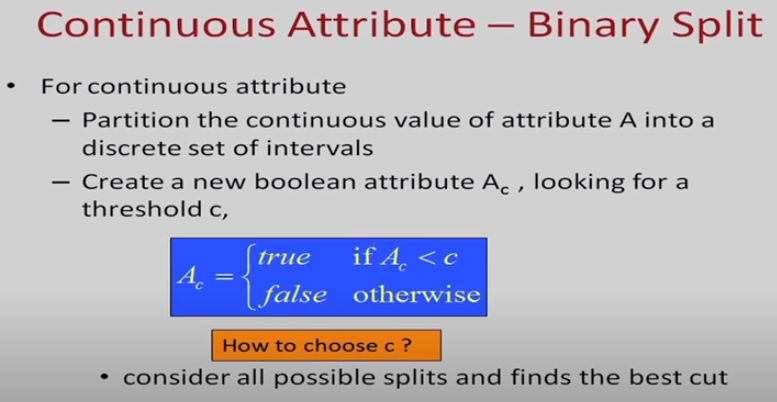

**Strengths, weaknesses, and parameters**

**The parameters that control model complexity in decision trees are the pre-pruning parameters** that stop the building of the tree before it is fully developed. Usually, picking one of the pre-pruning strategies—setting either max_depth, max_leaf_nodes, or min_samples_leaf—is sufficient to prevent overfitting.

*Decision trees have two advantages over many of the algorithms we’ve discussed so far: the resulting model can easily be visualized and understood by nonexperts (at least for smaller trees), and the algorithms are completely invariant to scaling of the data.* As each feature is processed separately, and the possible splits of the data don’t depend on scaling, no preprocessing like normalization or standardization of features is needed for decision tree algorithms. **In particular, decision trees work well when you have features that are on completely different scales, or a mix of binary and continuous features.**

*The **main downside** of decision trees is that even with the use of pre-pruning, they tend to overfit and provide poor generalization performance.* Therefore, in most applications, the ensemble methods we discuss next are usually used in place of a single decision tree.



> Practical Issues of DT -
* Over and Under-fitting
* Missing Values
* Cost of Classification

